In [1]:
# import numpy as np
# import pandas as pd
# from matplotlib.pyplot import subplots
# import statsmodels.api as sm
from ISLP import load_data

# from ISLP.models import ModelSpec as MS, summarize

In [2]:
from sklearn.linear_model import LogisticRegression

In [20]:
data = load_data("Default")
NoYesEncode = {"No": 0, "Yes": 1}
for col in ["default", "student"]:
    data.loc[:, col] = data[col].map(NoYesEncode)
X, y = data.loc[:, ["student", "balance", "income"]], data.loc[:, "default"]

/var/folders/p8/d728c3090pl_2q11s2tw8rjr0000gn/T/ipykernel_36319/935076960.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, col] = data[col].map(NoYesEncode)
/var/folders/p8/d728c3090pl_2q11s2tw8rjr0000gn/T/ipykernel_36319/935076960.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, col] = data[col].map(NoYesEncode)


,student,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879
...,...,...,...
9995,0,711.555020,52992.378914
9996,0,757.962918,19660.721768
9997,0,845.411989,58636.156984
9998,0,1569.009053,36669.112365


In [21]:
model = LogisticRegression(penalty=None)
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred).T
cm

array([[9608,  269],
       [  59,   64]])

In [36]:
y_pred2 = (model.predict_proba(X)[:, 1] >= 0.2).astype(bool)
cm2 = confusion_matrix(y, y_pred2).T
cm2

array([[9308,  177],
       [ 359,  156]])

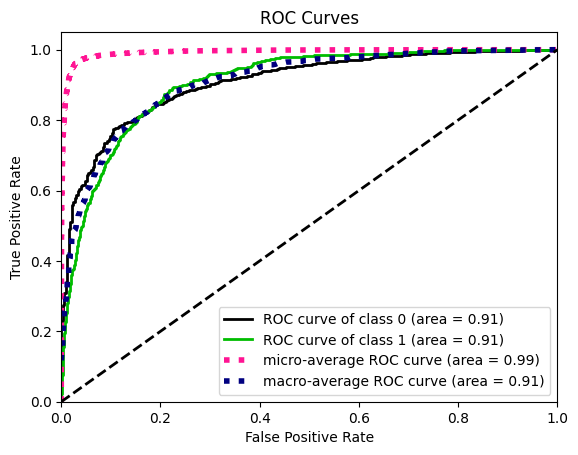

In [42]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probas = model.predict_proba(X)
skplt.metrics.plot_roc(y, y_probas)
plt.show()